In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
#Suppress warning
warnings.filterwarnings("ignore")

In [2]:
#Load the data
data = pd.read_csv("F:\\My Project\\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.drop(columns = ['Id'],inplace = True)

#Visulaizations

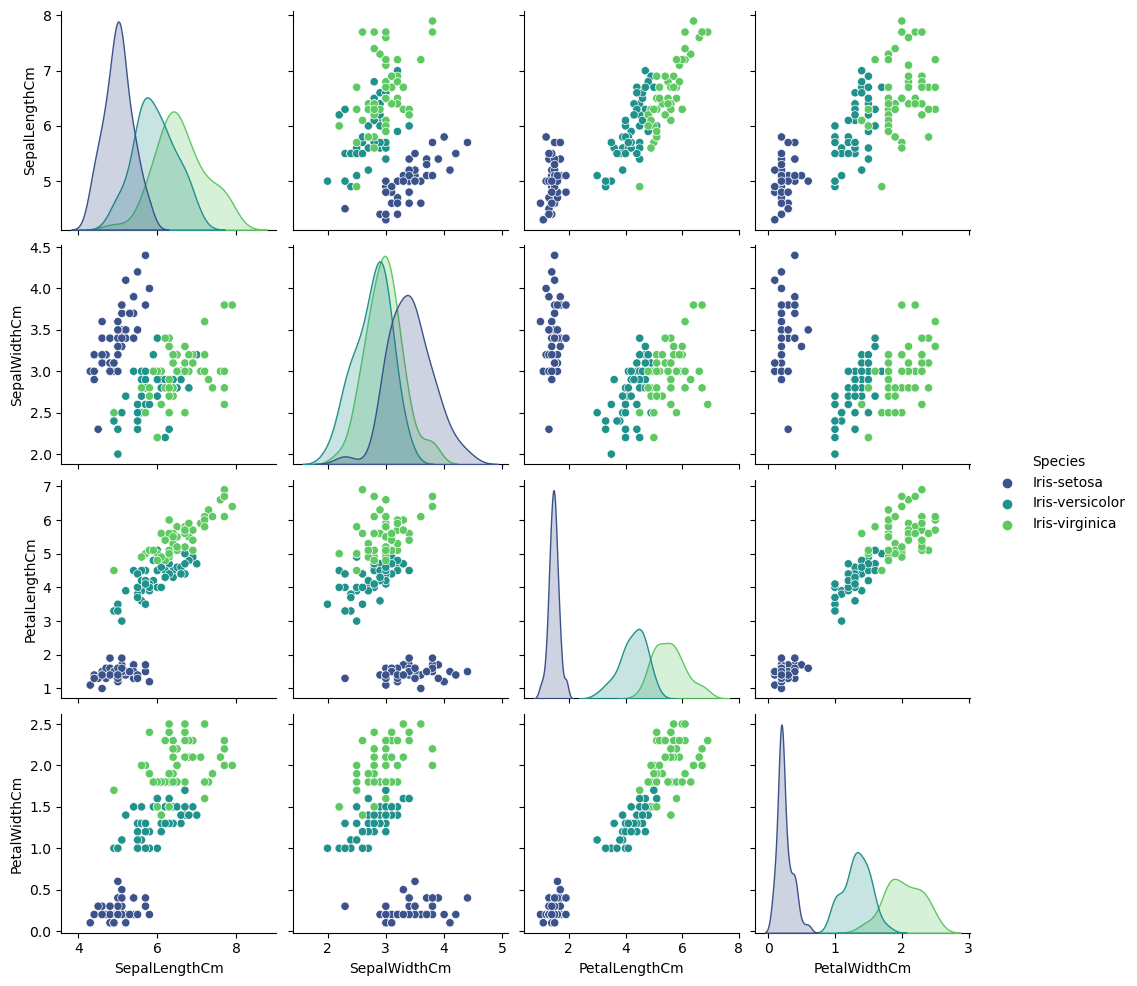

In [9]:
sns.pairplot(data,hue = "Species",palette = 'viridis')
plt.show()

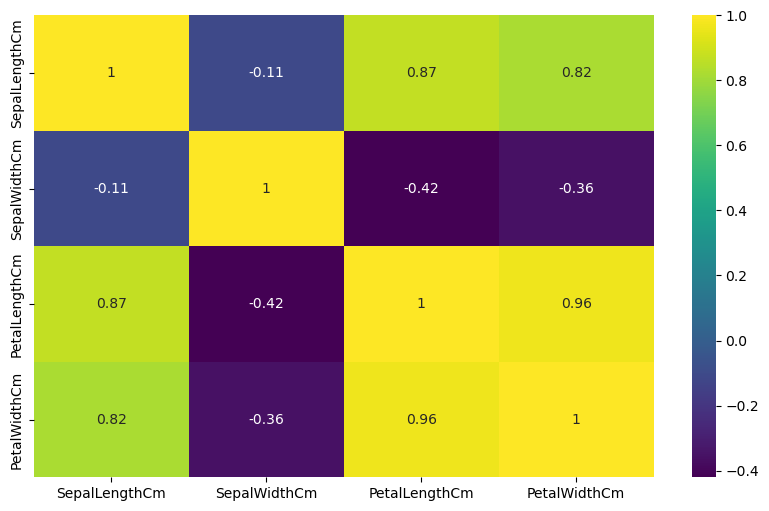

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only = True), annot=True, cmap='viridis')
plt.show()

#Preprocessing

In [11]:
x = data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

#Elbow method with WCSS

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

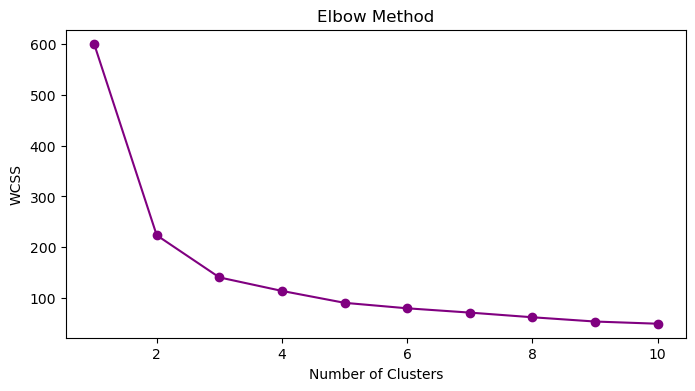

In [15]:
plt.figure(figsize = (8,4))
plt.plot(range(1,11),wcss,marker= 'o',color='purple')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
#KMeans clustering and prediction
optimal_clusters =3
kmeans = KMeans(n_clusters = optimal_clusters, init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_scaled)
data['Cluster']=kmeans.fit_predict(x_scaled)

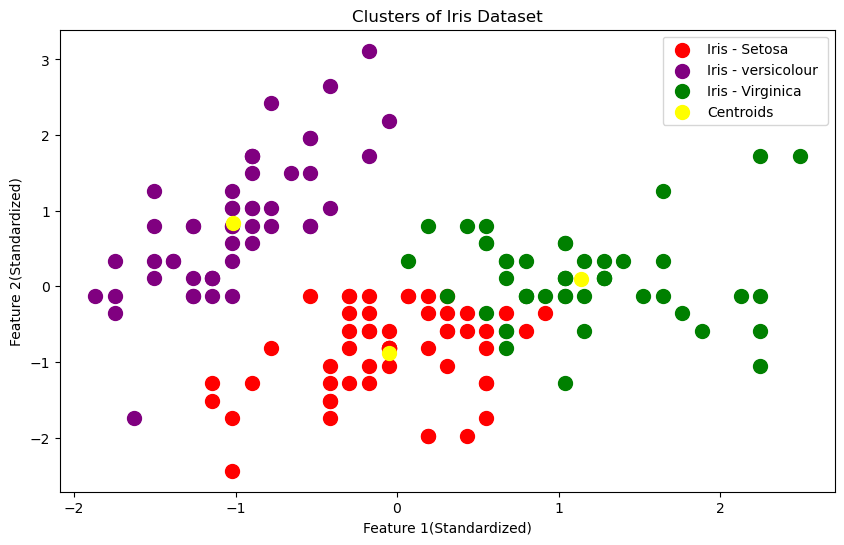

In [17]:
#Cluster visualization on first two columns
plt.figure(figsize = (10,6))
plt.scatter(x_scaled[data['Cluster']==0,0],x_scaled[data['Cluster']==0,1],s=100,c='red',label = 'Iris - Setosa')
plt.scatter(x_scaled[data['Cluster']==1,0],x_scaled[data['Cluster']==1,1],s=100,c='purple',label = 'Iris - versicolour ')
plt.scatter(x_scaled[data['Cluster']==2,0],x_scaled[data['Cluster']==2,1],s=100,c='g',label = 'Iris - Virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title("Clusters of Iris Dataset")
plt.xlabel("Feature 1(Standardized)")
plt.ylabel("Feature 2(Standardized)")
plt.legend()
plt.show()

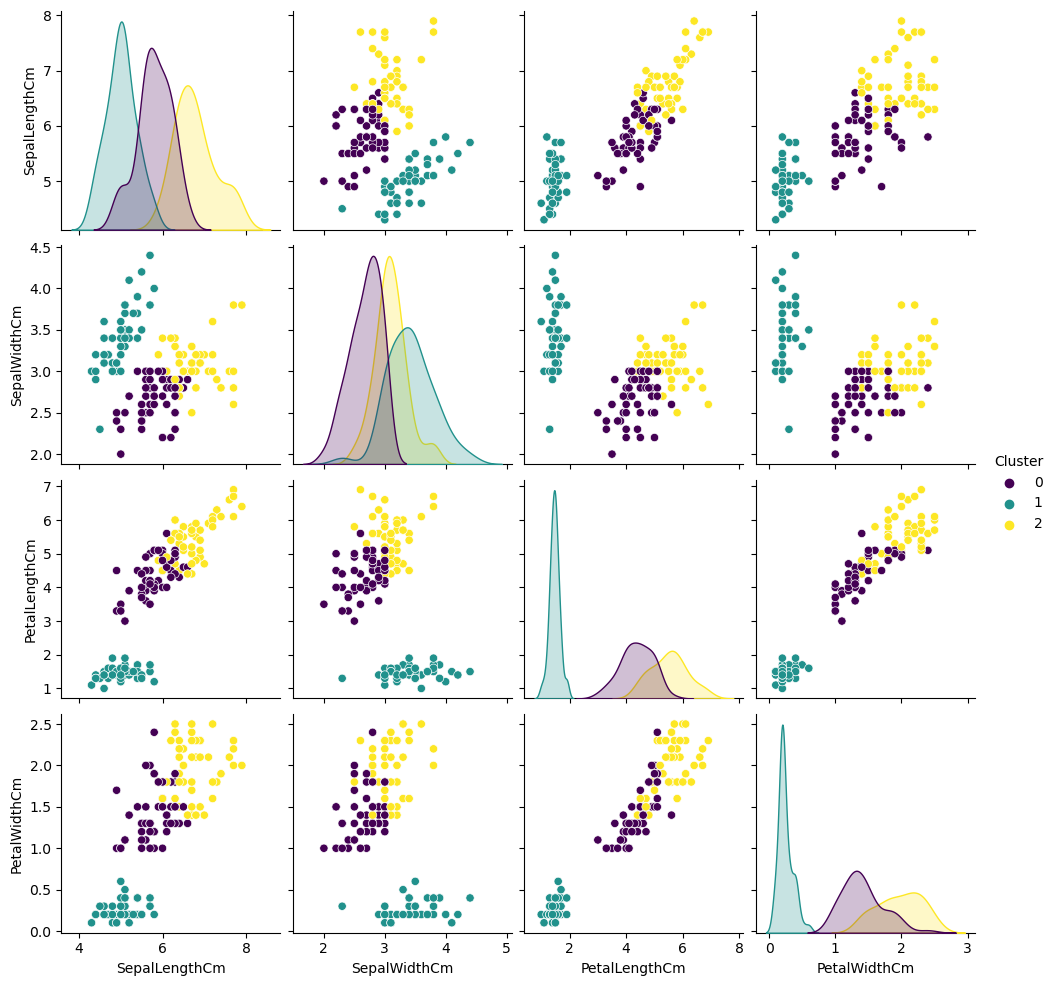

In [18]:
#pair plot with clusters
sns.pairplot(data,hue = "Cluster",palette = 'viridis')
plt.show()

In [19]:
#Visualizing the cluster center
centers=scaler.inverse_transform(kmeans.cluster_centers_)
centers_data = pd.DataFrame(centers,columns = x.columns)
print(centers_data)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.801887      2.673585       4.369811      1.413208
1       5.006000      3.418000       1.464000      0.244000
2       6.780851      3.095745       5.510638      1.972340


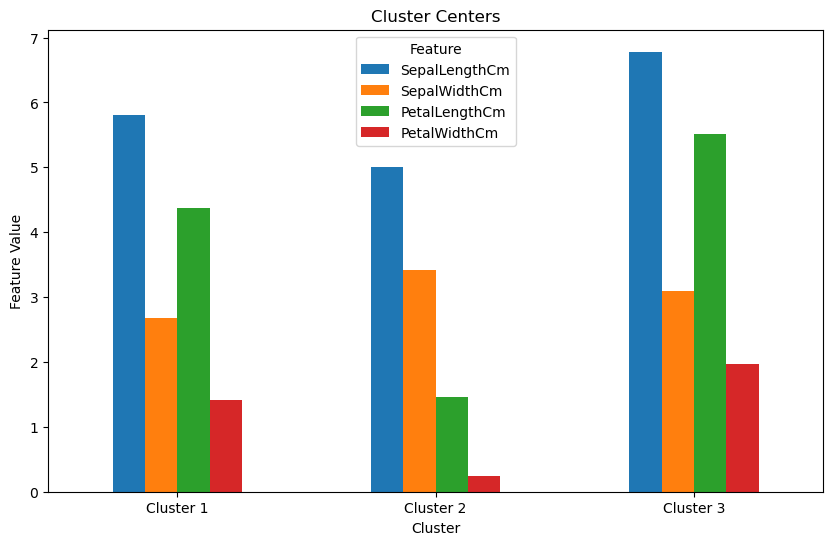

In [20]:
#Bar plot of cluster cneters
centers_data.plot(kind = 'bar', figsize = (10,6))
plt.title("Cluster Centers")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.xticks(ticks=np.arange(optimal_clusters), labels=[f'Cluster {i+1}' for i in range(optimal_clusters)], rotation=0)
plt.legend(title='Feature')
plt.show()